In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
%matplotlib inline

In [2]:

# get crypto history data according to user's input and save to csv file
def get_data(cryptocoin):
    data = yf.download(cryptocoin,'2016-01-01',date.today())
    print(data.head())
    print(data.tail())
    data.to_csv(cryptocoin + ".csv")
    return data


# Plot the close price of the chosen cryptocoin     
def close_price_graphic(data): 
    data['Close'].plot(color='gray')
    plt.show()
     
# candlestick chart and volume graphic on a specific year and month    
def monthly_candle(check_month):
    data = get_data(cryptocoin)
    check_month = pd.to_datetime(check_month).strftime('%Y-%m')
    data_monthly = data[check_month]
    mpf.plot(data_monthly, type="candle", 
            title= check_month + " Candlestick for " + cryptocoin, 
            ylabel="price", 
            style="binance", 
            volume=True,
            ylabel_lower="volume(shares)",
            figratio=(8, 4))

# candlestick chart and volume graphic on a specific year
def yaerly_candle(check_year):
    data = get_data(cryptocoin)
    check_year = pd.to_datetime(check_year).strftime('%Y')
    data_yearly = data[check_year]
    mpf.plot(data_yearly, type="candle",
         title = check_year + " Candlestick for " + cryptocoin, 
         ylabel="price", 
         style="binance", 
         volume=True,
         ylabel_lower="volume(shares)",
         figratio=(8, 4),
         mav=(10, 20, 50))


# compare multiple coin    
def two_coins_compare(coin_1st, coin_2nd, start_date):
    tickers_list = [coin_1st, coin_2nd]
    start_date = pd.to_datetime(start_date).strftime('%Y-%m-%d')
    # Fetch the data
    data = yf.download(tickers_list, start_date)['Adj Close']

    # Print first 5 rows of the data
    print(data.head())
    
    # Plot all the close prices
    ((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

    # Show the legend
    plt.legend()

    # Define the label for the title of the figure
    plt.title("Returns", fontsize=16)

    # Define the labels for x-axis and y-axis
    plt.ylabel('Cumulative Returns', fontsize=14)
    plt.xlabel('Year', fontsize=14)

    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()


Cryptocoin (example: bitcoin: BTC-CAD): BTC-CAD
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  597.151611  604.811462  592.706787  602.160706  602.160706   
2016-01-02  602.559937  604.556396  597.535339  599.704773  599.704773   
2016-01-03  599.898499  600.126831  587.538269  596.511230  596.511230   
2016-01-04  596.580627  603.804810  595.354065  603.425720  603.425720   
2016-01-05  603.395020  603.730103  598.409729  604.052856  604.052856   

              Volume  
Date                  
2016-01-01  50297067  
2016-01-02  41641656  
2016-01-03  54980007  
2016-01-04  53610701  
2016-01-05  48276404  
                    Open          High           Low         Close  \
Date                                                                 
2022-12-25  22987.578125  23005.382812  22780.777344  22922.044

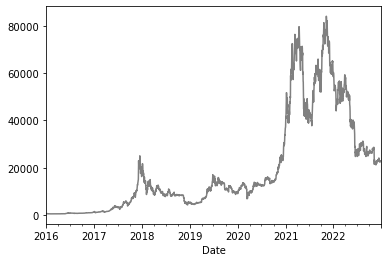

BTC-CAD, check year-month: 2021-8
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  597.151611  604.811462  592.706787  602.160706  602.160706   
2016-01-02  602.559937  604.556396  597.535339  599.704773  599.704773   
2016-01-03  599.898499  600.126831  587.538269  596.511230  596.511230   
2016-01-04  596.580627  603.804810  595.354065  603.425720  603.425720   
2016-01-05  603.395020  603.730103  598.409729  604.052856  604.052856   

              Volume  
Date                  
2016-01-01  50297067  
2016-01-02  41641656  
2016-01-03  54980007  
2016-01-04  53610701  
2016-01-05  48276404  
                    Open          High           Low         Close  \
Date                                                                 
2022-12-25  22987.578125  23005.382812  22780.777344  22922.044922   
2022-12

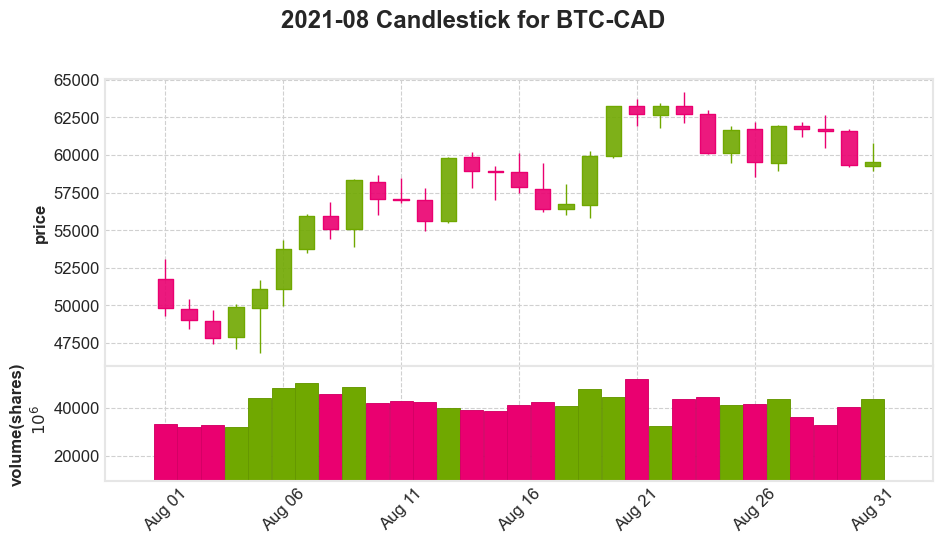

BTC-CAD, check year: 2018
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01  597.151611  604.811462  592.706787  602.160706  602.160706   
2016-01-02  602.559937  604.556396  597.535339  599.704773  599.704773   
2016-01-03  599.898499  600.126831  587.538269  596.511230  596.511230   
2016-01-04  596.580627  603.804810  595.354065  603.425720  603.425720   
2016-01-05  603.395020  603.730103  598.409729  604.052856  604.052856   

              Volume  
Date                  
2016-01-01  50297067  
2016-01-02  41641656  
2016-01-03  54980007  
2016-01-04  53610701  
2016-01-05  48276404  
                    Open          High           Low         Close  \
Date                                                                 
2022-12-25  22987.578125  23005.382812  22780.777344  22922.044922   
2022-12-26  229

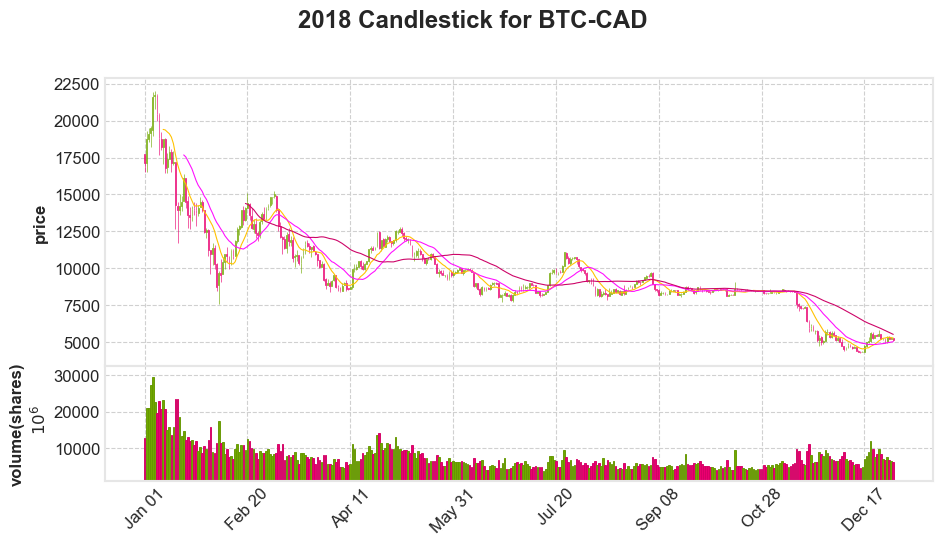

1st cryptocoin (example: bitcoin: BTC-CAD): BTC-CAD
2nd cryptocoin (example: dogecoin: DOGE-CAD): DOGE-CAD
Start comparing year: 2020
[*********************100%***********************]  2 of 2 completed
                BTC-CAD  DOGE-CAD
Date                             
2020-01-01  9346.539062  0.002639
2020-01-02  9070.249023  0.002608
2020-01-03  9550.185547  0.002790
2020-01-04  9635.706055  0.002914
2020-01-05  9627.375000  0.003142


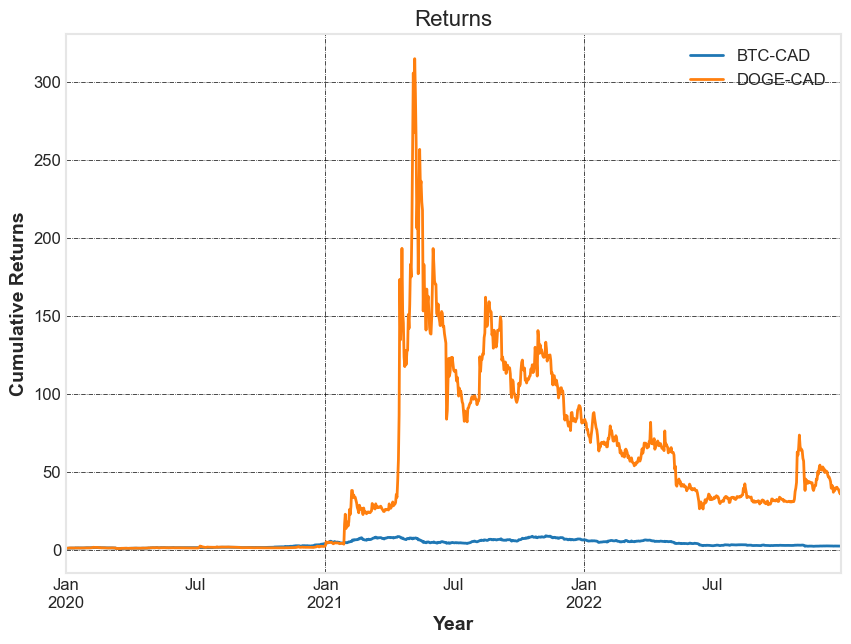

In [3]:

#Get data of the cryptocoin
#cryptocoin = 'BTC-CAD'
cryptocoin = input("Cryptocoin (example: bitcoin: BTC-CAD): ")
get_data(cryptocoin)

# to use the dataframe in other functions
data = get_data(cryptocoin)

# general price graphics
close_price_graphic(data)

# specific month and year data check
#check_month = "2022-11"
check_month = input(cryptocoin + ", check year-month: ")
monthly_candle(check_month)

# specific year data check
#check_year = "2022"
check_year = input(cryptocoin + ", check year: ")
yaerly_candle(check_year)
    
# compare 2 cryptocoins    
#coin_1st, coin_2nd = 'DOGE-CAD', 'LTC-CAD'
coin_1st = input("1st cryptocoin (example: bitcoin: BTC-CAD): ")
coin_2nd = input("2nd cryptocoin (example: dogecoin: DOGE-CAD): ")
start_date = input("Start comparing year: ")
two_coins_compare(coin_1st, coin_2nd, start_date)